In [1]:
using DelimitedFiles
using StatsBase
using Normalization
using Plots

In [2]:
function load_ecg2000(train_set_location::String, test_set_location::String)
    """As per typical UCR formatting, assume labels in first column, followed by data"""
    # do checks
    train_data = readdlm(train_set_location)
    test_data = readdlm(test_set_location)

    X_train = train_data[:, 2:end]
    y_train = Int.(train_data[:, 1])

    X_test = test_data[:, 2:end]
    y_test = Int.(test_data[:, 1])

    return (X_train, y_train), (X_test, y_test)

end

load_ecg2000 (generic function with 1 method)

In [5]:
(X_train, y_train), (X_test, y_test) = load_ecg2000("ecg2000_train.txt", "ecg2000_test.txt");

In [29]:
(X_train, y_train), (X_test, y_test) = load_iris("iris_train.txt", "iris_test.txt");

In [32]:
rs = RobustSigmoid(X_train);
x_train_scaled = rs(X_train)
x_test_scaled = rs(X_test);

In [37]:
x = vcat(x_train_scaled, x_test_scaled)

150×4 Matrix{Float64}:
 0.830368  0.539623  0.759779  0.430959
 0.866015  0.559279  0.780843  0.383086
 0.773973  0.509925  0.752458  0.430959
 0.85653   0.480157  0.759779  0.4116
 0.70548   0.519843  0.337378  0.247542
 0.680139  0.509925  0.355354  0.255012
 0.653689  0.519843  0.373747  0.233049
 0.759779  0.470256  0.644646  0.32856
 0.800545  0.490075  0.644646  0.337378
 0.67144   0.480157  0.346311  0.233049
 ⋮                             
 0.744988  0.5       0.653689  0.364501
 0.653689  0.519843  0.346311  0.233049
 0.737372  0.578751  0.311285  0.233049
 0.787562  0.480157  0.688715  0.383086
 0.721706  0.45053   0.597981  0.319861
 0.70548   0.480157  0.626253  0.337378
 0.737372  0.440721  0.578751  0.311285
 0.721706  0.480157  0.626253  0.337378
 0.635499  0.539623  0.29452   0.233049

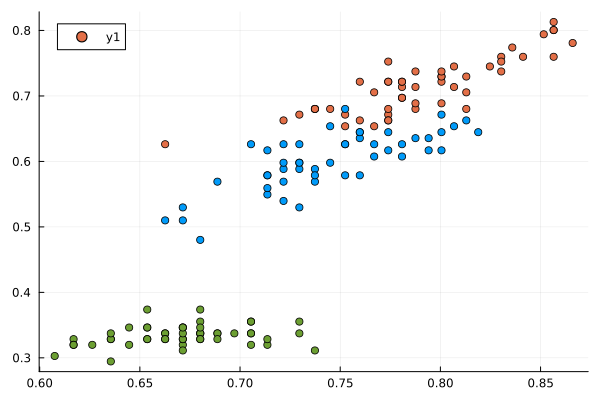

In [54]:
scatter(x[:, 1], x[:, 3], c=vcat(y_train, y_test))